In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [39]:
labels = os.listdir("/content/drive/MyDrive/train")

In [40]:
labels

['Closed', 'yawn', 'Open', 'no_yawn']

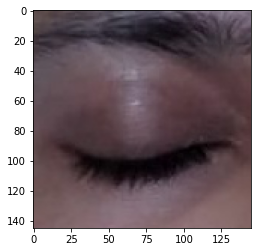

In [41]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/train/Closed/_0.jpg"))

In [42]:
a = plt.imread("/content/drive/MyDrive/train/yawn/10.jpg")

In [43]:
a.shape

(480, 640, 3)

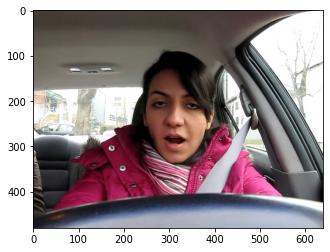

In [44]:
plt.imshow(plt.imread("/content/drive/MyDrive/train/yawn/10.jpg"))

In [45]:
def face_for_yawn(direc="/content/drive/MyDrive/train", face_cas_path="/content/drive/MyDrive/prediction images/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [46]:
def get_data(dir_path="/content/drive/MyDrive/train", face_cas="/content/drive/MyDrive/prediction images/haarcascade_frontalface_default.xml", eye_cas="/content/drive/MyDrive/prediction images/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [47]:
data_train = get_data()

2
3


In [48]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [49]:
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [50]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [51]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [52]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [53]:
y = np.array(y)

In [54]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [55]:
len(X_test)

578

In [56]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [57]:
tf.__version__


'2.8.0'

In [58]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [59]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [60]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))


Epoch 1/20
43/43 [==============================] - 368s 9s/step - loss: 1.2118 - accuracy: 0.4655 - val_loss: 0.9601 - val_accuracy: 0.6211
Epoch 2/20
43/43 [==============================] - 371s 9s/step - loss: 0.6059 - accuracy: 0.7506 - val_loss: 0.3756 - val_accuracy: 0.8581
Epoch 3/20
43/43 [==============================] - 369s 9s/step - loss: 0.4029 - accuracy: 0.8293 - val_loss: 0.3347 - val_accuracy: 0.8616
Epoch 4/20
43/43 [==============================] - 367s 9s/step - loss: 0.3557 - accuracy: 0.8493 - val_loss: 0.2494 - val_accuracy: 0.8997
Epoch 5/20
43/43 [==============================] - 365s 9s/step - loss: 0.2849 - accuracy: 0.8760 - val_loss: 0.2129 - val_accuracy: 0.9152
Epoch 6/20
43/43 [==============================] - 364s 8s/step - loss: 0.2890 - accuracy: 0.8745 - val_loss: 0.2189 - val_accuracy: 0.9083
Epoch 7/20
43/43 [==============================] - 363s 8s/step - loss: 0.2889 - accuracy: 0.8834 - val_loss: 0.1710 - val_accuracy: 0.9308
Epoch 8/20
43

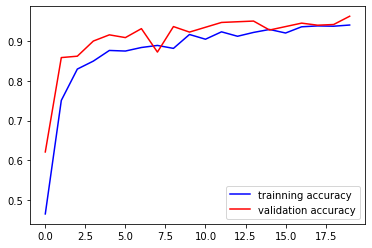

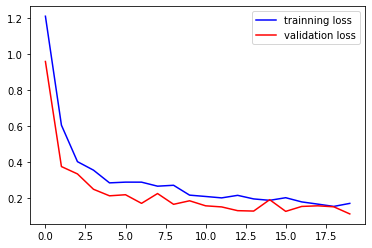

In [61]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [62]:
model.save("drowiness_new6.h5")

In [63]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model/assets


In [64]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [65]:
prediction = classes_x

In [66]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 1, 0, 3, 3, 3,
       2, 1, 1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2,
       2, 3, 3, 2, 1, 3, 3, 3, 2, 0, 0, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 0,
       3, 0, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 3, 0, 2, 2,
       1, 1, 2, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3,
       3, 0, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 3, 0, 3, 3,
       2, 2, 0, 3, 3, 0, 3, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 3, 1, 3, 1, 1, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0,
       1, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 1, 2, 2, 1, 3, 2, 3, 1,

In [67]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [68]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.89      0.79      0.84        63
     no_yawn       0.83      0.95      0.89        74
      Closed       0.98      0.92      0.95       215
        Open       0.93      0.97      0.95       226

    accuracy                           0.93       578
   macro avg       0.91      0.91      0.91       578
weighted avg       0.93      0.93      0.93       578



In [69]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="/content/drive/MyDrive/prediction images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

Prediction

0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [70]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("/content/drive/MyDrive/train/no_yawn/1067.jpg")])
np.argmax(prediction)

1

In [71]:
prediction = model.predict([prepare("/content/drive/MyDrive/train/Closed/_101.jpg")])
np.argmax(prediction)

2

In [72]:
prediction = model.predict([prepare("/content/drive/MyDrive/train/Open/_104.jpg")])
np.argmax(prediction)

3

In [78]:
prediction = model.predict([prepare("/content/drive/MyDrive/train/yawn/113.jpg")])
np.argmax(prediction)

3

3